<div style="background-color: #4CAF50; color: white; padding: 15px; border-radius: 8px; text-align: center; font-family: Arial, sans-serif;">
  <h2>Malaria Detection</h2>
</div>

<div style="text-align: center; color: #A5D6A7; font-size: 18px; margin-top: 10px;">
  <h4>Custom Convolutional Neural Network</h4>
</div>

<div style="background-color: #333; color: #FFFFFF; padding: 20px; border-radius: 8px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h4 style="text-align: left; color: #81C784;">Problem Understanding</h4>
  <p><strong>Objective:</strong> Detect malaria by classifying cell images as <em>infected</em> or <em>uninfected</em>.</p>
  <ul>
    <li><strong>Data:</strong> Use a publicly available dataset such as the <strong>Malaria Cell Images Dataset</strong>.</li>
    <li>Dataset provided by the <strong><a href=" https://ceb.nlm.nih.gov/repositories/malaria-datasets/">National Institute of Health (NIH)</a></strong>.</li>
  </ul>
</div>


<div style="background-color: #333; color: #FFFFFF; padding: 20px; border-radius: 8px; font-size: 16px; line-height: 1.6;">
  <h3 style="color: #4CAF50; font-family: Arial, sans-serif;">Data Preparation: Malaria Images Dataset</h3>
  
  <h4 style="color: #A5D6A7;">Step 1: Collect Data</h4>
  <p>
    The Malaria Images Dataset is publicly available on Kaggle for faster access. It is widely used for training machine learning models to detect malaria in cell images.
    The dataset is structured into two primary folders:
  </p>
  <ul style="margin-left: 20px;">
    <li><strong>Parasitized</strong>: Contains images of infected cells.</li>
    <li><strong>Uninfected</strong>: Contains images of healthy cells.</li>
  </ul>
  
  <h4 style="color: #A5D6A7;">Why Kaggle?</h4>
  <p>
    While the dataset is originally hosted by the National Institute of Health (NIH), downloading it from Kaggle offers faster speeds and easier access.
  </p>
  
  <p>We will:</p>
  <ul style="margin-left: 20px;">
    <li>Download the dataset directly from Kaggle using the <code>!kaggle datasets download</code> command.</li>
    <li>Organize the dataset into a working directory for preprocessing.</li>
    <li>Understand the dataset structure and preview the images before further steps.</li>
  </ul>
</div>



In [2]:
# Uncomment below line and run the cell
#%pip install kaggle

In [3]:
# Download the dataset from Kaggle
print("Downloading the dataset from Kaggle...")

!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria -p '../data'

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
 62%|█████████████████████████▎               | 417M/675M [13:28<07:39, 589kB/s]

<div style="background-color: #333; color: #FFFFFF; padding: 20px; border-radius: 8px; font-size: 16px; line-height: 1.6;">
  <h3 style="color: #4CAF50; font-family: Arial, sans-serif; text-align: left;">Extract: cell-images-for-detecting-malaria.zip</h3>
  
  <p>
    After downloading the Malaria Images Dataset, the next step is to extract the contents into a specified directory. 
    The dataset is organized into two main folders:
  </p>
  <ul style="margin-left: 20px;">
    <li><strong>Parasitized</strong>: Contains images of cells infected with malaria parasites.</li>
    <li><strong>Uninfected</strong>: Contains images of healthy, malaria-free cells.</li>
  </ul>
  <p>
    Use the code below to extract the dataset into the working directory and ensure it is ready for preprocessing:
  </p>
</div>


In [ ]:
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from data_preprocessing import Preprocessor

# Create instance of Preprocessor
processor = Preprocessor('../data')
# Call the function
cell_images = processor.load_data('../data/cell-images-for-detecting-malaria.zip') 


Extracting the dataset from '../data/cell-images-for-detecting-malaria.zip' to '../data'...
Dataset extracted successfully!

Extracted Folder Structure:
data/
    cell_images/
        cell_images/
            Parasitized/
            Uninfected/
        Parasitized/
        Uninfected/


<div style="background-color: #4CAF50; color: white; padding: 15px; border-radius: 8px; font-family: Arial, sans-serif;">
  <h2 style="text-align: center; font-size: 28px; margin-bottom: 10px;">Malaria Detection - Data Preprocessing</h2>
  <p style="font-size: 16px; line-height: 1.6; margin: 0;">
    In this step, we preprocess the <strong>Malaria Detection Dataset</strong> to prepare it for training a deep learning model.
    The dataset contains labeled images of infected (<em>Parasitized</em>) and uninfected cells. 
    The steps include:
  </p>
  <ul style="font-size: 16px; line-height: 1.6; margin: 10px 0 0 20px;">
    <li>Loading and resizing the images to a uniform size of <code>128x128</code>.</li>
    <li>Normalizing pixel values to the range [0, 1].</li>
    <li>Checking class balance to understand the dataset distribution.</li>
    <li>Splitting the data into training, validation, and test sets.</li>
    <li>Applying data augmentation for better model generalization.</li>
  </ul>
</div>


In [2]:
# Create instance Preprocessor Class
processor = Preprocessor(target_size=(128, 128))

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Path to dataset
dataset_path = '../data/cell_images/cell_images'

# Step 1: Load and Resize Images
images, labels = processor.resize_images(dataset_path)

# Step 2: Normalize Images
images = processor.normalize_images(images)

# Step 3: Check Class Balance
class_counts = processor.check_class_balance(labels)

# Step 4: Split Data
train_images, val_images, test_images, train_labels, val_labels, test_labels = processor.split_data(images, labels)

# # Step 5: Data Augmentation
# data_generator = processor.augment_data()

# # Display an Example Augmented Image
# example_image = train_images[0]
# plt.figure(figsize=(6, 6))
# plt.imshow(example_image / np.max(example_image))  # Rescale for display
# plt.title("Original Image")

# augmented_example = next(data_generator.flow(np.expand_dims(example_image, 0)))[0]
# plt.figure(figsize=(6, 6))
# plt.imshow(augmented_example / np.max(augmented_example))  # Rescale for display
# plt.title("Augmented Image")
# plt.show()


Loading and resizing images...
Skipping non-image file: /kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/Thumbs.db
Skipping non-image file: /kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/Thumbs.db
Skipping non-image file: /kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected
Skipping non-image file: /kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized
Normalizing images...
Checking class balance...
Parasitized: 13779
Uninfected: 13779
Splitting data into training, validation, and test sets...


In [4]:
print(train_images.shape)


(15432, 128, 128, 3)


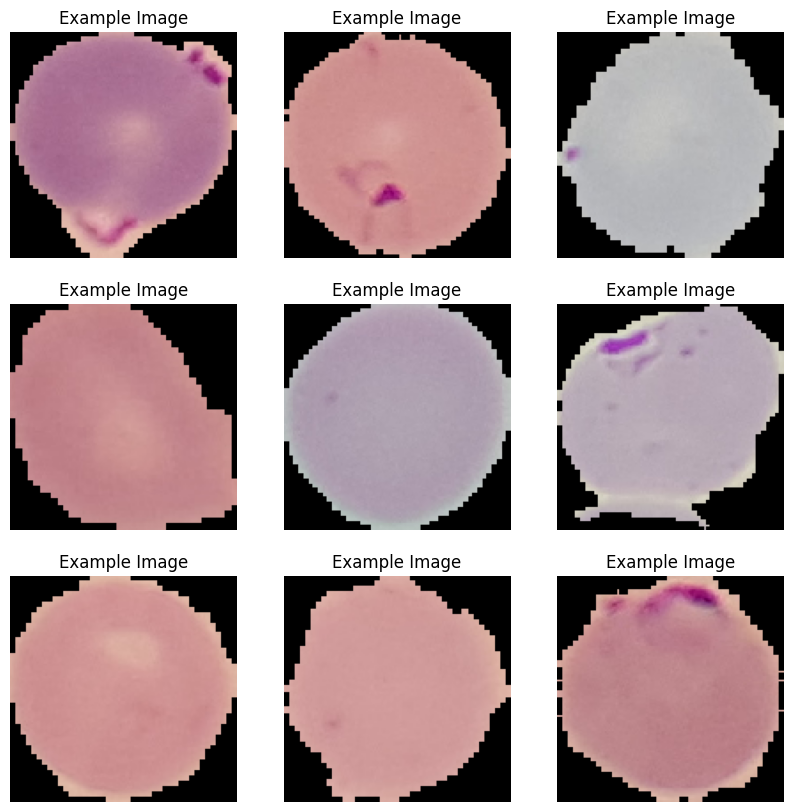

In [6]:
import matplotlib.pyplot as plt

# Visualizing the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.title("Example Image")
    plt.axis("off")
plt.show()


In [4]:
# Map labels to integers: "Parasitized" -> 0, "Uninfected" -> 1
label_mapping = {"Parasitized": 0, "Uninfected": 1}
train_labels = np.array([label_mapping[label] for label in train_labels])
val_labels = np.array([label_mapping[label] for label in val_labels])
test_labels = np.array([label_mapping[label] for label in test_labels])


<div style="background-color: #4CAF50; color: white; padding: 15px; border-radius: 8px; font-family: Arial, sans-serif;">
  <h2 style="text-align: center; font-size: 28px; margin-bottom: 10px;">Malaria Detection - Model Training</h2>
  <p style="font-size: 16px; line-height: 1.6; margin: 0;">
    In this step, we train a model using the <strong>Malaria Detection Dataset</strong> with a custom Convolutional Neural Network (CNN) architecture. 
    The dataset contains labeled images of infected (<em>Parasitized</em>) and uninfected cells. 
    The training process involves the following steps:
  </p>
  <ul style="font-size: 16px; line-height: 1.6; margin: 10px 0 0 20px;">
    <li>Building a CNN model with multiple convolutional, pooling, and fully connected layers.</li>
    <li>Training the CNN model with the training set, using techniques such as dropout, L2 regularization, and batch normalization for regularization.</li>
    <li>Validating the model on the validation set to optimize hyperparameters like dropout rate and learning rate.</li>
    <li>Evaluating the final model's performance on the test set to measure accuracy and loss.</li>
    <li>Saving the trained CNN model for deploying an API endpoint.</li>
    <li>Testing the model on new cell images to assess its real-world applicability.</li>
  </ul>
</div>


In [5]:
# TensorFlow Dataset Preparation
'''
This code demonstrates how to prepare datasets for training, 
validation,and testing using **TensorFlow's `tf.data` API**, 
which helps build scalable and efficient input pipelines. 

'''

import tensorflow as tf

# Training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32)

# Validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)

# Test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(32)

In [7]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [14]:
# Import the custom cnn
from custom_cnn import CustomCNN

Epoch 1/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5726 - loss: 2.6658

I0000 00:00:1733661769.548923      98 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_2', 256 bytes spill stores, 256 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion', 256 bytes spill stores, 256 bytes spill loads



Epoch 1: Loss=1.6402, Accuracy=0.6023
483/483 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5727 - loss: 2.6637 - val_accuracy: 0.7722 - val_loss: 0.9631 - learning_rate: 0.0010
Epoch 2/50
481/483 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7316 - loss: 0.9812Epoch 2: Loss=0.8693, Accuracy=0.7799
483/483 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7319 - loss: 0.9805 - val_accuracy: 0.8966 - val_loss: 0.5724 - learning_rate: 0.0010
Epoch 3/50
481/483 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8615 - loss: 0.6408Epoch 3: Loss=0.6061, Accuracy=0.8802
483/483 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8616 - loss: 0.6405 - val_accuracy: 0.9378 - val_loss: 0.4721 - learning_rate: 0.0010
Epoch 4/50
481/483 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9105 - loss: 0.5181Epoch 4: Loss=0.4988, Accuracy=0.9156
483/483 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9105 - loss: 0.5180 - val_accuracy: 0.9414 - val_loss: 0.4195 - learning_rate: 0.0010
Epoch 5/50
481/483

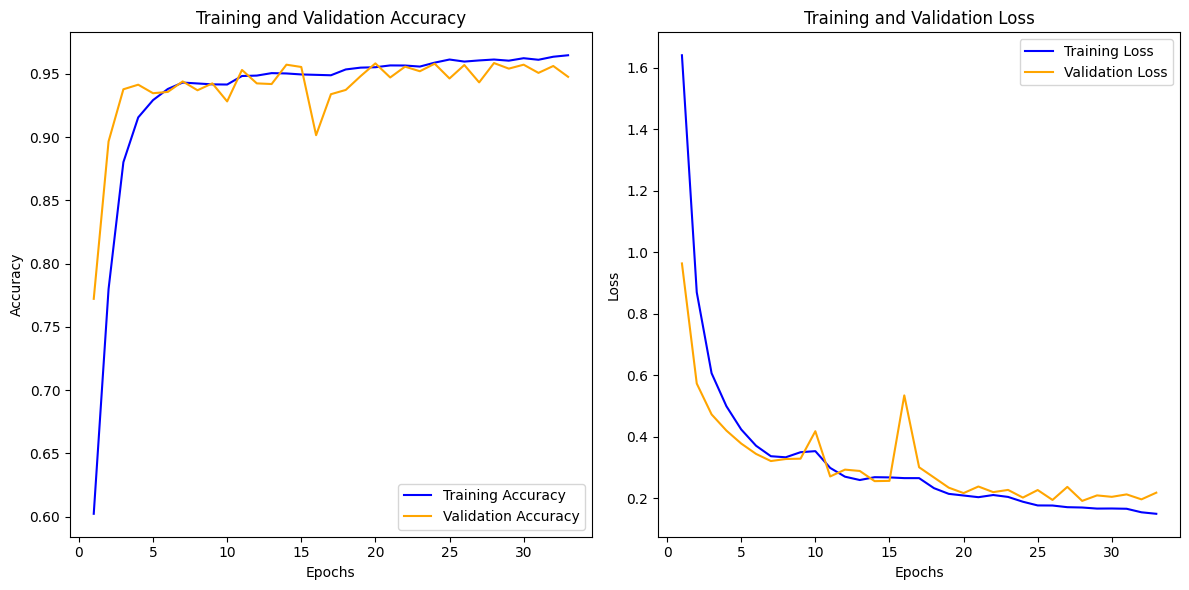

In [15]:
# Initialize the model with input shape and number of output classes
cnn_tuning = CustomCNN(input_shape=(128, 128, 3), num_classes=2)

# Train the model with training and validation datasets, specifying hyperparameters
history = cnn_tuning.train_model(train_dataset, val_dataset, epochs=50, dropout_rate=0.5, l2_reg=0.001, batch_norm=True)

# Plot the training and validation accuracy and loss
cnn_tuning.plot_training_history(history)

In [16]:
test_loss, test_accuracy = cnn_tuning.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9541 - loss: 0.1989
Test Loss: 0.1934, Test Accuracy: 0.9562
Test Accuracy: 95.62%


In [18]:
# Save the trained model
cnn_tuning.save_model('../data/my_cnn_model.keras')

Model saved to my_cnn_model.keras in keras format.


In [20]:
cnn_tuning.log_hyperparameters('../data/hyperparameter_log.json')

Hyperparameters logged to hyperparameter_log.json
